In [237]:
import pandas as pd
import numpy as np
import time

In [238]:
while True:
    try:
        basics = pd.read_csv('H:\\MSIT 2nd Year\\DADV\\Selenium\\IMDB Data\\Data\\basics.tsv',delimiter='\t',encoding='utf-8')
        break
    except:
        print(" not reading..")
        time.sleep(5)
        pass

c:\users\someshwar thumma\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [239]:
while True:
    try:
        ratings = pd.read_csv('H:\\MSIT 2nd Year\\DADV\\Selenium\\IMDB Data\\Data\\ratings.tsv',delimiter='\t',encoding='utf-8')
        break
    except:
        print(" not reading.. just waiting")
        time.sleep(5)
        pass

In [240]:
SuperDf = pd.merge(basics,ratings,on='tconst')

Q1. find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [242]:
df["popular"] = (0.5*SuperDf.numVotes)*(SuperDf.averageRating)
df['popular'] = (df['popular']/df['popular'].max())

In [243]:
# df["popular"] = (SuperDf.averageRating)
# df['popular'] = (df['popular']/df['popular'].max())*100

In [244]:
df["startYear"] = pd.to_numeric(df["startYear"], errors='coerce')

In [245]:
df = df[df['numVotes']>=1000]

In [246]:
#if rank is considered as the ranking paramenter
# df["rank"] = df["popular"].rank(ascending=False)
# df.head()

In [247]:
tempDf=df[df.titleType=="movie"]
tempDf = tempDf[df.startYear>1999]
tempDf = tempDf[tempDf.startYear<2010]

c:\users\someshwar thumma\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [248]:
#if popularity is considered as the ranking paramenter
tempDf.sort_values("popular", axis = 0, ascending = False, inplace = True, na_position ='last')
tempDf.head(10)["averageRating"].mean()

8.580000000000002

In [249]:
#if rank considered as the ranking paramenter
#tempDf["rank"].mean()

Q2: find the year in the 1900s when the average rank increased the most, compared to the previous year. 
(Ignore movies with votes < 1000)

In [250]:
tempDf=df[df.titleType=="movie"]
tempDf = tempDf[tempDf.startYear>=1900]
tempDf = tempDf[tempDf.startYear<2000]

In [251]:
tempDf = tempDf[tempDf.numVotes>1000]

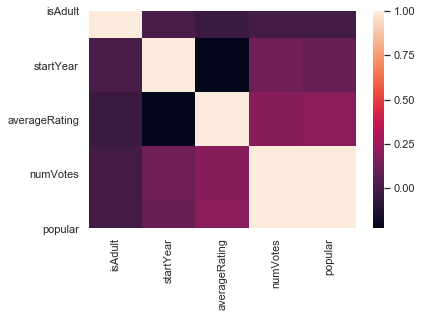

In [253]:
corr = tempDf.corr()
ax = sns.heatmap(corr)

In [254]:
tempD = tempDf.groupby('startYear').agg(
    mp=('popular', np.mean),
    mv=('numVotes',np.mean),
    mr=('averageRating',np.mean)    
).reset_index()

In [255]:
tempD.sort_values("startYear", axis = 0, ascending = True, inplace = True, na_position ='last')
tempD.head()

,startYear,mp,mv,mr
0,1911.0,0.000707,2038.0,7.000
1,1913.0,0.000494,1453.5,6.875
2,1914.0,0.000617,1878.6,6.600
3,1915.0,0.001902,5844.4,6.800
4,1916.0,0.002769,7311.5,7.000


In [256]:
index = 0.0
flag = True
prevMp = 0.0
maximum = 0.0
for i in range(len(tempD.mp)):
    if flag:
        flag = False
        prevMp = float(tempD.mp[i])
        pass
    if (float(tempD.mp[i])-prevMp) > maximum:
        maximum = (float(tempD.mp[i])-prevMp)
        index = i
    prevMp =  float(tempD.mp[i])
print(int(tempD.startYear[index]))

1994


Q3. find the expected average rank for 2013 using linear regression. How good is this regression? 

In [257]:
tempD.head()

,startYear,mp,mv,mr
0,1911.0,0.000707,2038.0,7.000
1,1913.0,0.000494,1453.5,6.875
2,1914.0,0.000617,1878.6,6.600
3,1915.0,0.001902,5844.4,6.800
4,1916.0,0.002769,7311.5,7.000


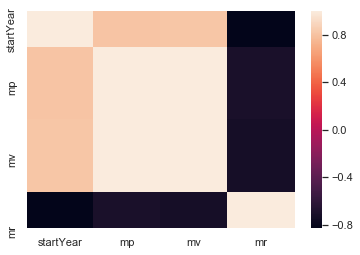

In [258]:
import seaborn as sns; sns.set()
corr = tempD.corr()
ax = sns.heatmap(corr)

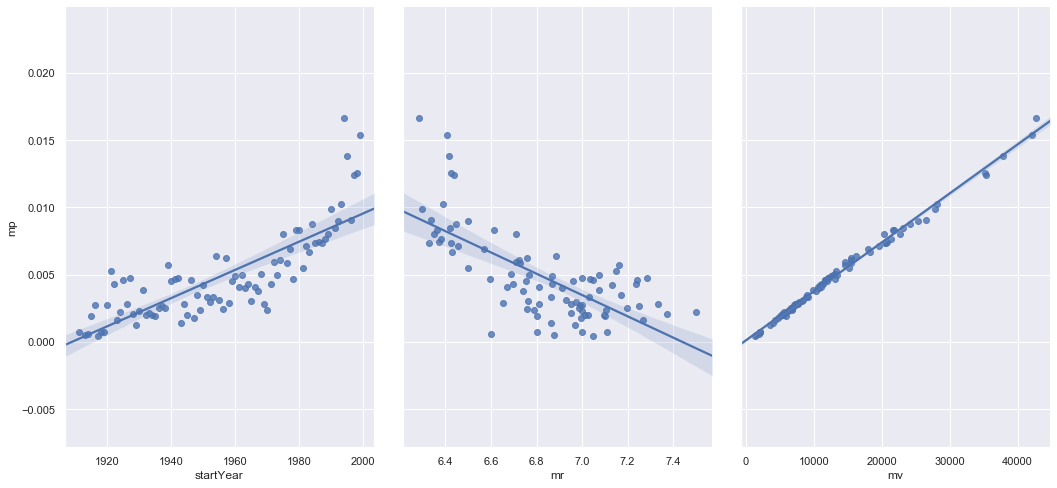

In [259]:
sns.pairplot(tempD, x_vars=['startYear', 'mr','mv'], y_vars='mp', size=7, aspect=0.7, kind='reg')

In [260]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [261]:
# X = tempD.startYear.values.reshape(-1,1)
# Y = tempD.mp.values.reshape(-1,1)

In [262]:
X = tempD[['startYear', 'mr','mv']].values
Y = tempD.mp.values

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [264]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
y_pred = regressor.predict(X_test)

In [266]:
df2 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df2.head()

,Actual,Predicted
0,0.000617,0.000544
1,0.004591,0.004560
2,0.003061,0.003035
3,0.003356,0.003409
4,0.004707,0.004786


In [267]:
x = np.array([2013.0,7.069894291754758,18523.999154334037])
# print("Expected average rank in terms of mean popularity, for 2013: "+str(regressor.predict(x.reshape(1,-1))[0][0]))
print("Predicted: "+str(regressor.predict(x.reshape(1,-1))[0]))

Predicted: 0.007039039659962608


In [268]:
print("Actual: "+str(np.mean(df[df.startYear == 2013.0].iloc[:,[5,11,9,10]].popular)))

Actual: 0.006551138165330072


How good is this regression? 

In [269]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2.Actual, df2.Predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(df2.Actual, df2.Predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2.Actual, df2.Predicted)))

Mean Absolute Error: 0.00014537100341971635
Mean Squared Error: 4.005094258134058e-08
Root Mean Squared Error: 0.00020012731592998639


From the above mean, MSE, RMSE values obtained from the model, we can conclude that we have less error when predicting the actual values. So we can conclude the model is good.

Q6. find the correlation between rank and votes for each year in the 1900s. 
By how much did the correlation coefficient grow each year? 

In [270]:
df = SuperDf

In [271]:
df["popular"] = (SuperDf.averageRating)
df['popular'] = (df['popular']/df['popular'].max())
df["startYear"] = pd.to_numeric(df["startYear"], errors='coerce')
df = df[df['numVotes']>=1000]

In [272]:
tempDf = df[df.startYear>=1900]
tempDf = tempDf[tempDf.startYear<2000]
Y = pd.DataFrame()
Y = tempDf.iloc[:, [5,10,11]]
Y.sort_values("startYear", axis = 0, ascending = True, inplace = True, na_position ='last')

c:\users\someshwar thumma\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [273]:
Y.head()

,startYear,numVotes,popular
95861,1900.0,1911,0.70
262,1901.0,2281,0.71
94303,1901.0,1367,0.70
128490,1901.0,1409,0.69
287,1902.0,40307,0.82


In [274]:
years = list(Y['startYear'].unique())
yearCorr = pd.DataFrame()
for year in years:
    X=Y[Y['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['numVotes'][1]
    newRow = {'Correlation':corr,'Year':year}
    yearCorr = yearCorr.append(newRow, ignore_index=True)
yearCorr = yearCorr.reindex(columns=['Year', 'Correlation'])
print(yearCorr)

      Year  Correlation
0   1900.0          NaN
1   1901.0     0.844959
2   1902.0          NaN
3   1903.0     0.308331
4   1904.0          NaN
..     ...          ...
95  1995.0     0.095468
96  1996.0     0.027670
97  1997.0     0.052947
98  1998.0     0.069581
99  1999.0     0.086169

[100 rows x 2 columns]


c:\users\someshwar thumma\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


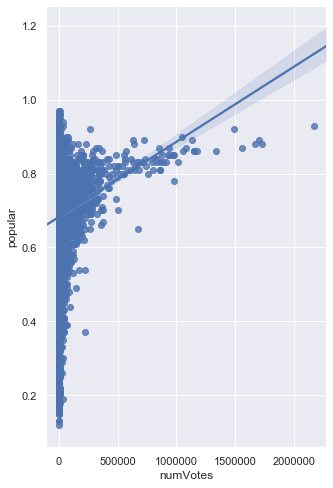

In [275]:
sns.pairplot(Y, x_vars=['numVotes'], y_vars='popular', size=7, aspect=0.7, kind='reg')

By Comparing with the correlated values with obtained graph we can conclude that number of votes and the popularity as rank are positively correlated